**Importing Modules**

In [73]:
import numpy as np
import pandas as pd
import io
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import plot_tree
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

**Loading the Data**

In [24]:
uploaded_data = files.upload()
loaded_data = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
loaded_data.head()

Saving Data.csv to Data (2).csv


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,0,1,2,8,1,0,0,0,3,0,4,6,60,1027549,31,0,0,126,1.203939,4.81,7.25,10.02,0
1,1,12,0,2,0,0,0,0,3,3,9,4,110,400531,19,0,0,6,3.375939,3.61,6.58,4.98,0
2,0,0,0,3,2,0,1,0,0,3,0,4,157,608589,41,24153,0,126,2.972357,4.18,12.56,7.82,1
3,0,3,2,2,1,0,0,0,1,0,2,4,57,522208,28,0,0,63,2.506175,6.17,7.90,7.91,0
4,1,6,2,4,3,0,1,0,1,3,5,7,185,442829,35,0,0,110,1.121894,4.51,8.20,7.28,1


**Visualizing the Data**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


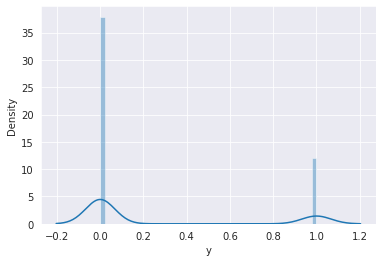

In [28]:
sns.distplot(loaded_data['y'])

**Understanding the Data**

In [29]:
loaded_data.describe()

,x2,x3,x5,x6,x7,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.412700,1.081200,2.397200,0.447300,0.675200,1.501400,1.988700,4.531200,3.529500,121.808200,5.930538e+05,31.554800,3267.275700,283.497800,127.355400,2.014869,5.009280,10.032794,7.988933,0.242000
std,3.462568,1.191028,1.235227,1.193216,0.468323,1.123087,1.420273,2.870653,2.298273,43.172621,3.342775e+05,8.143539,23103.082676,1281.899531,38.787892,0.991098,0.990554,2.000036,1.603187,0.428316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,4.325700e+04,3.000000,0.000000,0.000000,3.000000,-1.884801,1.450000,2.900000,2.360000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,88.000000,3.653175e+05,28.000000,0.000000,0.000000,126.000000,1.345720,4.340000,8.690000,6.910000,0.000000
50%,3.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,5.000000,4.000000,116.000000,5.570185e+05,31.000000,0.000000,0.000000,126.000000,2.014534,5.010000,10.040000,7.980000,0.000000
75%,4.000000,2.000000,3.000000,0.000000,1.000000,3.000000,3.000000,7.000000,6.000000,151.000000,7.416855e+05,38.000000,0.000000,0.000000,141.000000,2.695249,5.680000,11.390000,9.070000,0.000000
max,15.000000,6.000000,5.000000,4.000000,1.000000,3.000000,4.000000,9.000000,7.000000,283.000000,4.291793e+06,50.000000,314156.000000,12252.000000,311.000000,5.664434,8.900000,18.460000,13.820000,1.000000


**Finding the mode for the categorical variables which have NaN values**

In [42]:
loaded_data['x1'].value_counts()

0       7033
1        822
4        603
None     578
5        369
2        320
3        267
6          5
7          3
Name: x1, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


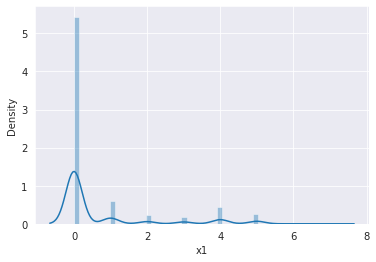

In [44]:
mode_1=loaded_data['x1'].mode()[0]
loaded_data['x1'].replace({"None": mode_1}, inplace=True)
sns.distplot(loaded_data['x1'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


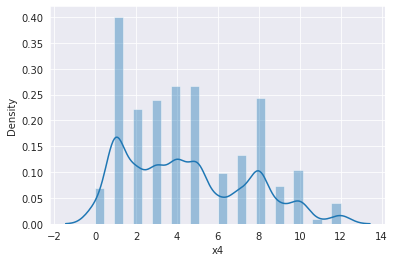

In [45]:
mode_4=loaded_data['x4'].mode()[0]
loaded_data['x4'].replace({"None": mode_4}, inplace=True)
sns.distplot(loaded_data['x4'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


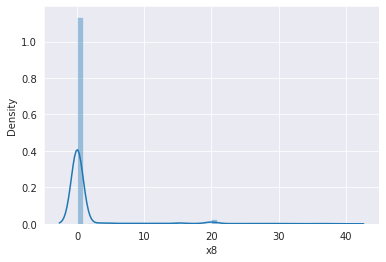

In [46]:
mode_8=loaded_data['x8'].mode()[0]
loaded_data['x8'].replace({"None": mode_8}, inplace=True)
sns.distplot(loaded_data['x8'])

**Preparing the Data for training**

In [48]:
X = loaded_data.iloc[:,0:22]
y = loaded_data.iloc[:,22]
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0,1,2,8,1,0,0,0,3,0,4,6,60,1027549,31,0,0,126,1.203939,4.81,7.25,10.02
1,1,12,0,2,0,0,0,0,3,3,9,4,110,400531,19,0,0,6,3.375939,3.61,6.58,4.98
2,0,0,0,3,2,0,1,0,0,3,0,4,157,608589,41,24153,0,126,2.972357,4.18,12.56,7.82
3,0,3,2,2,1,0,0,0,1,0,2,4,57,522208,28,0,0,63,2.506175,6.17,7.90,7.91
4,1,6,2,4,3,0,1,0,1,3,5,7,185,442829,35,0,0,110,1.121894,4.51,8.20,7.28


**Upsampling the Data**

In [49]:
from imblearn.over_sampling import SMOTE 
x_smote, y_smote = SMOTE().fit_sample(X,y)
X = pd.DataFrame(x_smote) 
y = pd.DataFrame(y_smote)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
np.unique(y,return_counts=True) 

(array([0, 1]), array([7580, 7580]))

**Performing GridSearch to find the Best Decision Tree Classifier**

In [69]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
model = model_selection.GridSearchCV(DecisionTreeClassifier(random_state=520),
                         cv=5,
                         n_jobs=-1,
                         # iid=True,
                         param_grid={
                            'min_samples_split': range(2,25),
                            'max_depth': np.arange(5,50,5)
                         })


model.fit(X_train, y_train)
print('Optimal parameters:', model.best_params_)
y_test_hat = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

Optimal parameters: {'max_depth': 10, 'min_samples_split': 3}
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.8604881266490765
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1507
           1       0.87      0.85      0.86      1525

    accuracy                           0.86      3032
   macro avg       0.86      0.86      0.86      3032
weighted avg       0.86      0.86      0.86      3032



**Confusion Matrix for Decision Tree Classifier**

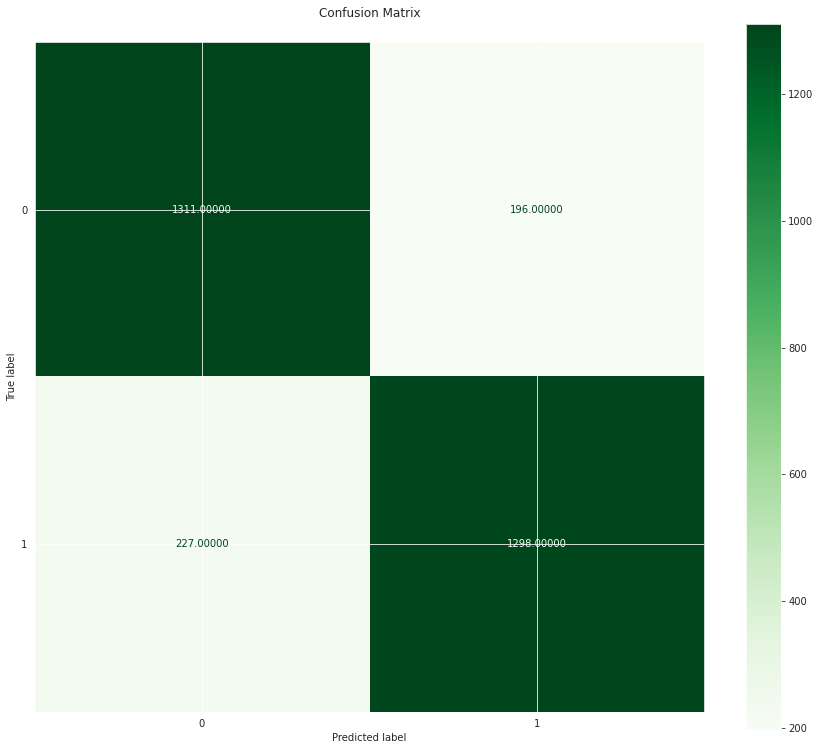

In [70]:
fig,ax= plt.subplots(figsize=(15,13))
ax.set_title("Confusion Matrix",pad = 25)
plot_confusion_matrix(model, X_test,y_test, ax =ax,cmap=plt.cm.Greens, values_format = '.5f')

**Error Metrics for Decision Tree Classifier**

In [71]:
BER = (196/(196+1311) + 227/(227+1298))/2
Error = 1 - metrics.accuracy_score(y_test, y_test_hat)
print('Balanced Error Rate:', BER)
print('Error:', Error)

Balanced Error Rate: 0.1394560901584953
Error: 0.13951187335092352


**Performing GridSearch to find the Best Random Forest Classifier**

In [61]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
param_grid = {"criterion" : ["gini", "entropy"],
              "n_estimators": [50,100,150,200],
              "min_samples_split": [3],
              "max_depth": [10]
             }
forest = RandomForestClassifier(random_state = 1)

# run grid search
model = model_selection.GridSearchCV(forest, param_grid=param_grid, scoring = 'roc_auc')

model.fit(X_train, y_train)
print('Optimal parameters:', model.best_params_)
y_test_hat = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Generalization error:')
print(1-metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

Optimal parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.8845646437994723
Generalization error:
0.1154353562005277
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1507
           1       0.88      0.89      0.89      1525

    accuracy                           0.88      3032
   macro avg       0.88      0.88      0.88      3032
weighted avg       0.88      0.88      0.88      3032



**Confusion Matrix for Random Forest Classifier**

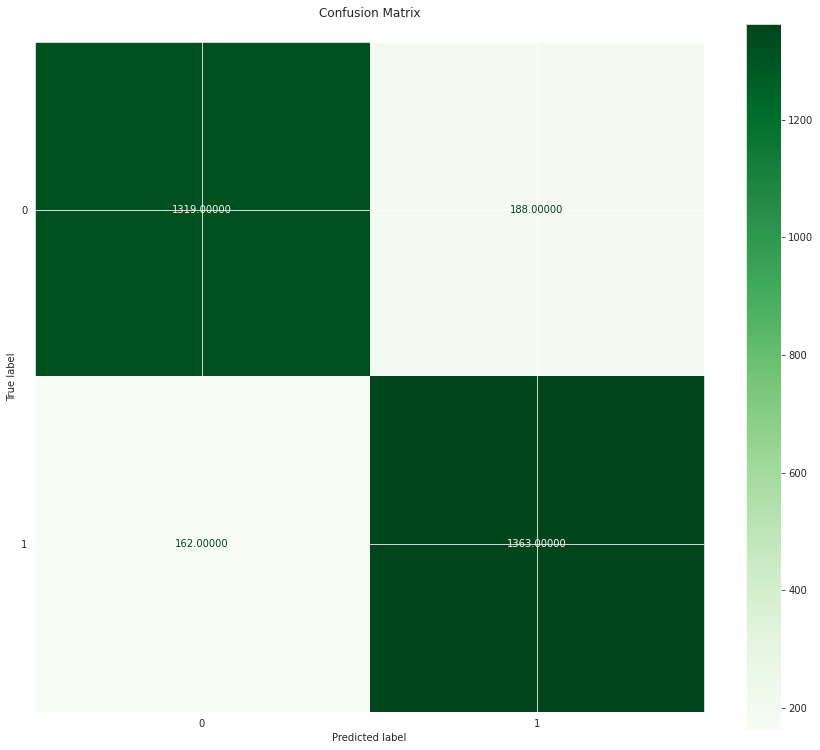

In [67]:
fig,ax= plt.subplots(figsize=(15,13))
ax.set_title("Confusion Matrix",pad = 25)
plot_confusion_matrix(model, X_test,y_test, ax =ax,cmap=plt.cm.Greens, values_format = '.5f')

**Error Metrics for Random Forest Classifier**

In [68]:
BER = (188/(188+1319) + 162/(162+1363))/2
Error = 1 - metrics.accuracy_score(y_test, y_test_hat)
print('Balanced Error Rate:', BER)
print('Error:', Error)

Balanced Error Rate: 0.11549033472211645
Error: 0.1154353562005277


**Performing GridSearch to find the Best AdaBoost Classifier**

In [74]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["random"],
              "n_estimators": [50,100,150,200],
              "algorithm" : ["SAMME.R"],
              "learning_rate" : [.01,.05,.1]
             }

DTC = DecisionTreeClassifier(max_depth = 10, min_samples_split = 3, criterion = 'entropy', splitter = 'best')
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
model = model_selection.GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

model.fit(X_train, y_train)
print('Optimal parameters:', model.best_params_)
y_test_hat = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Generalization error:')
print(1-metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))

Optimal parameters: {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 0.01, 'n_estimators': 150}
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.9149076517150396
Generalization error:
0.08509234828496037
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1507
           1       0.92      0.91      0.91      1525

    accuracy                           0.91      3032
   macro avg       0.91      0.91      0.91      3032
weighted avg       0.91      0.91      0.91      3032



**Confusion Matrix for Ada Boost Classifier**

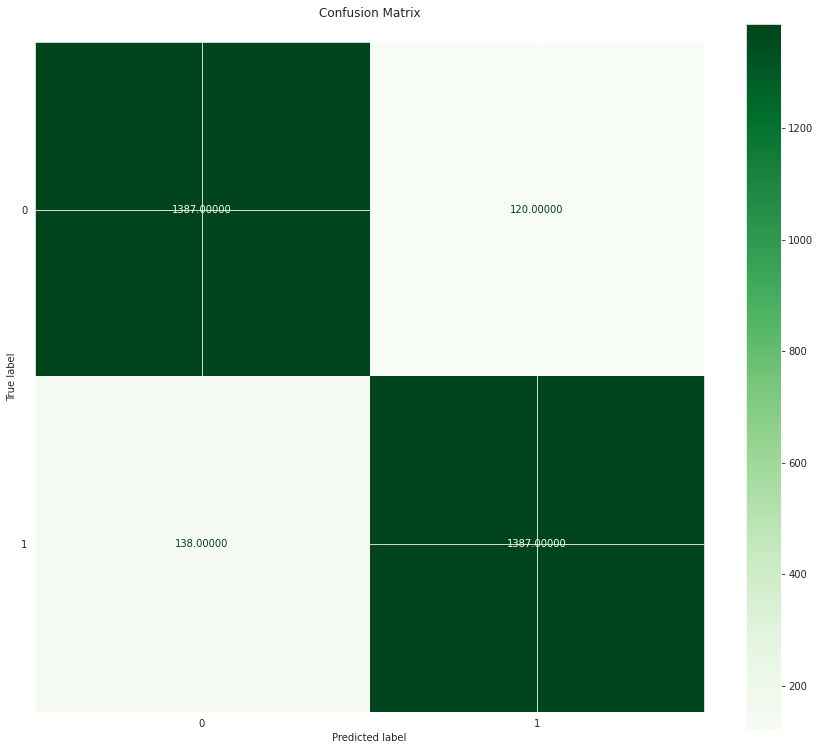

In [75]:
fig,ax= plt.subplots(figsize=(15,13))
ax.set_title("Confusion Matrix",pad = 25)
plot_confusion_matrix(model, X_test,y_test, ax =ax,cmap=plt.cm.Greens, values_format = '.5f')

**Error Metrics for Ada Boost Classifier**

In [76]:
BER = (120/(120+1387) + 138/(138+1387))/2
Error = 1 - metrics.accuracy_score(y_test, y_test_hat)
print('Balanced Error Rate:', BER)
print('Error:', Error)

Balanced Error Rate: 0.08506010203748626
Error: 0.08509234828496037


**Predicting the Unlabeled Data and exporting it**

In [78]:
test = files.upload()
Unlabeled_data = pd.read_csv(io.BytesIO(test['Unlabeled.csv']))
Unlabeled_data.head()

Saving Unlabeled.csv to Unlabeled (1).csv


,instance,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,y
0,1,None,0,1,None,1,4,0,0,0,4,6,0,123,749964,41,0,0,126,0.692012,7.39,12.42,5.81,NaN
1,2,3,6,2,8,3,3,1,0,3,2,3,6,82,846197,35,0,0,173,2.548396,4.28,11.79,7.58,NaN
2,3,0,0,0,5,2,0,1,0,2,0,6,5,104,130722,41,0,0,126,2.052980,5.14,11.58,8.96,NaN
3,4,0,3,0,1,2,0,1,0,3,2,6,2,91,934762,28,0,0,126,1.025860,3.90,11.79,5.20,NaN
4,5,4,3,2,8,3,4,0,0,2,2,4,3,141,465653,28,0,0,126,0.798833,4.68,10.15,6.59,NaN


In [79]:
Unlabeled_data['x1'].replace({"None": 0}, inplace=True)
Unlabeled_data['x4'].replace({"None": 1}, inplace=True)
Unlabeled_data['x8'].replace({"None": 0}, inplace=True)

In [80]:
X_unlabeled = Unlabeled_data.iloc[:,1:23]
X_unlabeled = pd.DataFrame(X_unlabeled) 
X_unlabeled.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0,0,1,1,1,4,0,0,0,4,6,0,123,749964,41,0,0,126,0.692012,7.39,12.42,5.81
1,3,6,2,8,3,3,1,0,3,2,3,6,82,846197,35,0,0,173,2.548396,4.28,11.79,7.58
2,0,0,0,5,2,0,1,0,2,0,6,5,104,130722,41,0,0,126,2.052980,5.14,11.58,8.96
3,0,3,0,1,2,0,1,0,3,2,6,2,91,934762,28,0,0,126,1.025860,3.90,11.79,5.20
4,4,3,2,8,3,4,0,0,2,2,4,3,141,465653,28,0,0,126,0.798833,4.68,10.15,6.59


In [81]:
y_unlabeled_pred = model.predict(X_unlabeled)

In [83]:
output = pd.DataFrame(y_unlabeled_pred)

In [84]:
output.to_csv("predicted.csv",index=False)